# Ferromagnetic Thin Film on a Diamagnetic Substrate

In this widget, I am modeling the magnetic hysterisis curve of a ferromagnetic thin film on a diamagnetic substrate.

I shall model the ferromagnetic hysterisis loop as two sigma functions shifted from the origin by the coercivity,.

$$ M_f = M_s\sigma(H \pm C) $$

Where

$$\sigma(H) = \frac{1}{1-e^{-H}}$$

$M_s$ is a scaling factor corresponding to the difference in saturation magnetization and retenrivity and $R$ is the retentivity.


The slope of the linear diamagnetic contribution will be decided by the thickness of the substrate.

$$ M_d \propto \chi t $$

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
from matplotlib.patches import Ellipse

In [79]:
# defining all the functions

sat = 30  # Saturation field
md0 = 0.1
C = 1

#sigma function shifted by coercivity

def sigma(x):
    
    return np.exp(x)/(1+np.exp(x))-0.5

def Mf_plus(x):
    
    return 2*sat*sigma(x-C)

def Mf_minus(x):
    
    return 2*sat*sigma(x+C)

def Md(x,t):
    
    return -md0*x*t

def net_field_minus(x,t):
    
    return Mf_plus(x)+Md(x,t)

def net_field_plus(x,t):
    
    return Mf_minus(x)+Md(x,t)

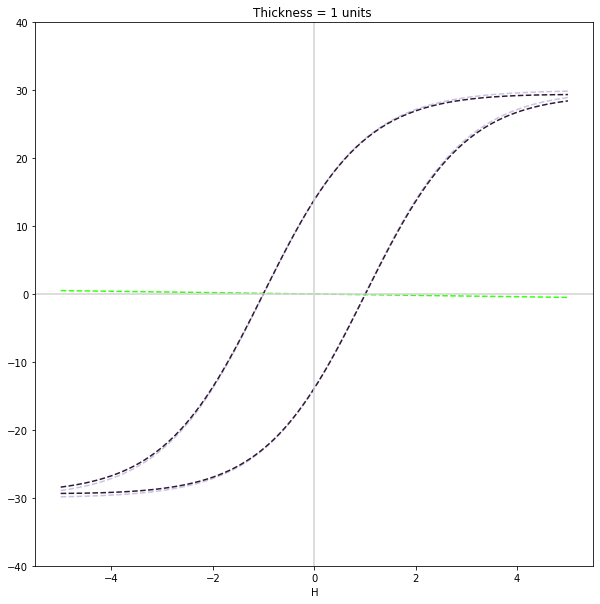

In [80]:
# Define the plotting function and plot a sample graph

xs = np.linspace(-5,5,1000)

def plot_all(t,scale):
    
    fix, ax = plt.subplots(figsize=(10,10))
    ax.set_xlabel("H")
    ax.set_ylabel=("M")
    ax.plot(xs, Mf_plus(xs),color='#CBC3E3',linestyle='--')
    ax.plot(xs, Mf_minus(xs),color='#CBC3E3',linestyle='--')
    ax.plot(xs,Md(xs,t),color='#39FF14',linestyle='--')
    ax.plot(xs, net_field_plus(xs,t),color='#301934',linestyle='--')
    ax.plot(xs, net_field_minus(xs,t),color='#301934',linestyle='--')
    ax.set_ylim(-40*scale,40*scale)
    ax.set_title('Thickness = '+str(t)+ " units ")
    ax.axhline(0,color='#D3D3D3')
    ax.axvline(0,color='#D3D3D3')

    
plot_all(1,1)

In [81]:
# Make interactive widget

interact(plot_all, t=widgets.FloatSlider(min=1,max=100,step=5),scale=widgets.FloatSlider(min=1,max=4,step=0.1))


interactive(children=(FloatSlider(value=1.0, description='t', min=1.0, step=5.0), FloatSlider(value=1.0, descr…

<function __main__.plot_all(t, scale)>

# Observation: There seems to be an invariant point! Let us draw a circle with the radius as the point where the diamagnetic curve intersects the net curve

The radius can be found by finding the value of x (numerically) that minimizes the distance function

$$K = 2H_s\sigma(x-C)+m_{d0}xt$$

where $H_s$ is the saturation field and C is coercivity

In [136]:
def K(x,t):
    
    return np.abs(net_field_plus(x,t)-Md(x,t))

Md(xs,1)[400]

0.09959959959959958

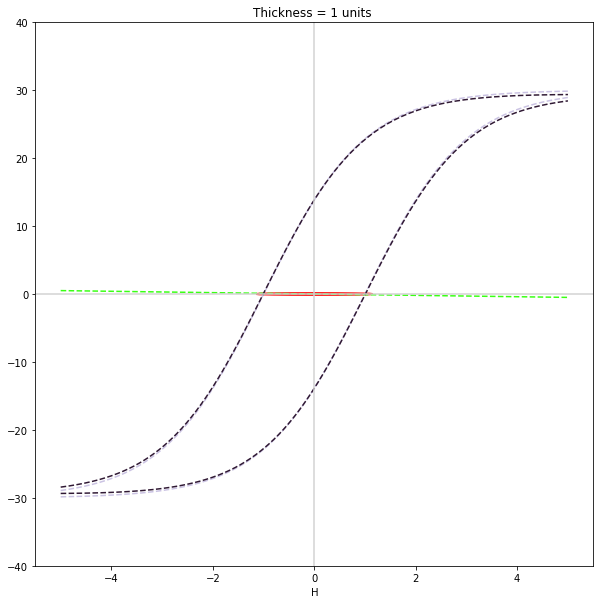

In [152]:
def plot_circle(t,scale):
    
    fix, ax = plt.subplots(figsize=(10,10))
    ax.set_xlabel("H")
    ax.set_ylabel=("M")
    ax.plot(xs, Mf_plus(xs),color='#CBC3E3',linestyle='--')
    ax.plot(xs, Mf_minus(xs),color='#CBC3E3',linestyle='--')
    ax.plot(xs,Md(xs,t),color='#39FF14',linestyle='--')
    ax.plot(xs, net_field_plus(xs,t),color='#301934',linestyle='--')
    ax.plot(xs, net_field_minus(xs,t),color='#301934',linestyle='--')
    ax.set_ylim(-40*scale,40*scale)
    ax.set_title('Thickness = '+str(t)+ " units ")
    M_min = Md(xs,t)[400]
    H_min = xs[400]
    ellipse = Ellipse(xy=(0, 0), width=H_min*2.3, height=M_min*2.5, 
                        edgecolor='r', fc='None', lw=2)
    ax.add_patch(ellipse)
    
    ax.axhline(0,color='#D3D3D3')
    ax.axvline(0,color='#D3D3D3')

    
plot_circle(1,1)

In [153]:
# Make interactive widget

interact(plot_circle, t=widgets.FloatSlider(min=1,max=100,step=5),scale=widgets.FloatSlider(min=1,max=4,step=0.1))


interactive(children=(FloatSlider(value=1.0, description='t', min=1.0, step=5.0), FloatSlider(value=1.0, descr…

<function __main__.plot_circle(t, scale)>